In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [3]:
file_list = glob("./data/*")
file_list

['./data\\conversionRates.csv',
 './data\\freeformResponses.csv',
 './data\\multipleChoiceResponses.csv',
 './data\\RespondentTypeREADME.txt',
 './data\\schema.csv']

In [4]:
mcq = pd.read_csv(file_list[4])
mcq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Column    290 non-null    object
 1   Question  290 non-null    object
 2   Asked     290 non-null    object
dtypes: object(3)
memory usage: 6.9+ KB


In [5]:
mcq.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [6]:
mca = pd.read_csv(file_list[2], encoding="cp437", low_memory=False)
mca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16716 entries, 0 to 16715
Columns: 228 entries, GenderSelect to JobFactorPublishingOpportunity
dtypes: float64(13), object(215)
memory usage: 29.1+ MB


In [7]:
mca.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
mcq[mcq["Column"] == "LanguageRecommendationSelect"]

,Column,Question,Asked
18,LanguageRecommendationSelect,What programming language would you recommend ...,All


In [9]:
mca.loc[:, mca.columns == "LanguageRecommendationSelect"].value_counts().head()

LanguageRecommendationSelect
Python                          6941
R                               2643
SQL                              385
C/C++/C#                         307
Matlab                           238
dtype: int64

In [10]:
mca["LanguageRecommendationSelect"].value_counts().index

Index(['Python', 'R', 'SQL', 'C/C++/C#', 'Matlab', 'Java', 'Scala', 'SAS',
       'Other', 'Julia', 'Stata', 'Haskell', 'F#'],
      dtype='object')

<Axes: xlabel='count', ylabel='LanguageRecommendationSelect'>

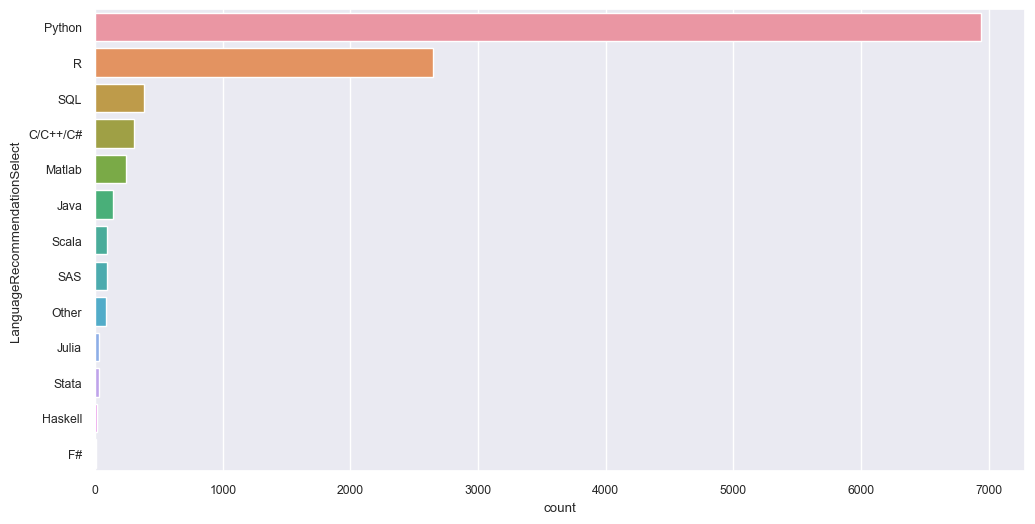

In [11]:
plt.figure(figsize=(12, 6))
sns.set(font_scale=0.8)
sns.countplot(mca, y="LanguageRecommendationSelect", order=mca["LanguageRecommendationSelect"].value_counts().index)

In [12]:
mca["CurrentJobTitleSelect"].value_counts().head()

Data Scientist                          2433
Software Developer/Software Engineer    1759
Other                                   1233
Data Analyst                            1213
Scientist/Researcher                     978
Name: CurrentJobTitleSelect, dtype: int64

<Axes: xlabel='count', ylabel='CurrentJobTitleSelect'>

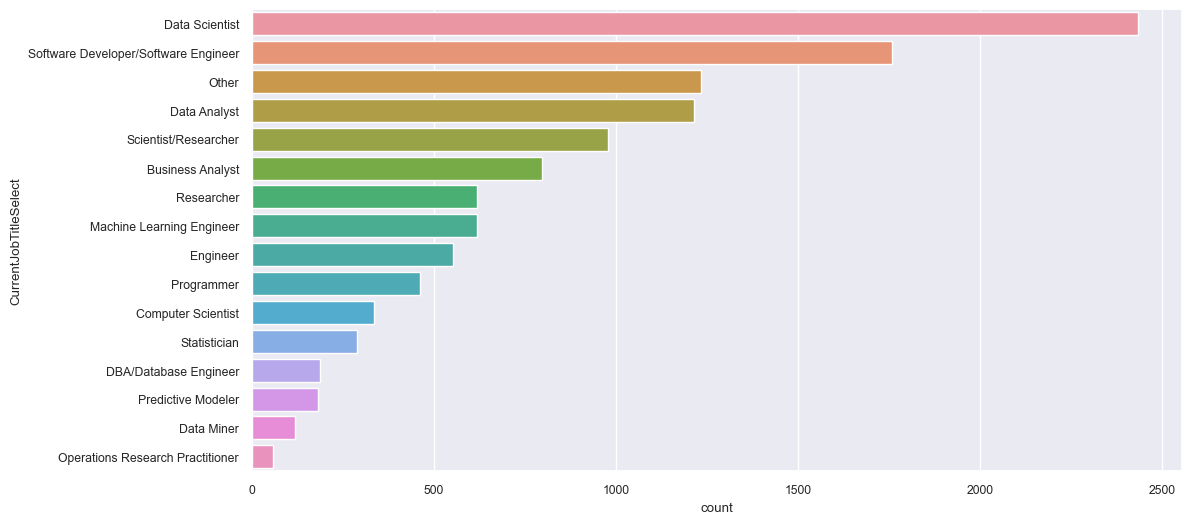

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(mca, y="CurrentJobTitleSelect", order=mca["CurrentJobTitleSelect"].value_counts().index)

In [30]:
# count() Method는 Nan 컬럼은 세지 않는다.
mca["CurrentJobTitleSelect"].count()

11830

In [32]:
# 컬럼 값이 Null(Nan)인 아이들만...
mca["CurrentJobTitleSelect"].isnull().sum()

4886

In [36]:
# 컬럼 수 세기
mca["CurrentJobTitleSelect"].notnull().count()

16716